# Bank Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


## Age distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

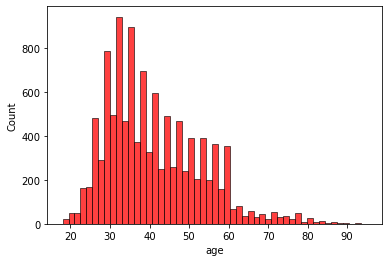

In [7]:
sns.histplot(df['age'],color='red')

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

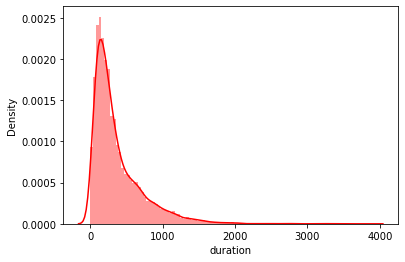

In [12]:
sns.distplot(df.duration, bins=100, color='red')

In [15]:
df_data = df.copy()

In [16]:
df_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [18]:
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

In [20]:
for j in jobs:
    print("{:15} : {:5}". format(j, len(df_data[(df_data.deposit == "yes") & (df_data.job ==j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [22]:
df_data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [24]:
df_data['job'] = df_data['job'].replace(['management', 'admin.'], 'white-collar')
df_data['job'] = df_data['job'].replace(['services','housemaid'], 'pink-collar')
df_data['job'] = df_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [25]:
df_data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [27]:
df_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [31]:
df_data['poutcome'] = df_data['poutcome'].replace(['other'] , 'unknown')
df_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [34]:
# Drop 'contact', as every participant has been contacted. 
df_data.drop('contact', axis=1, inplace=True)

In [38]:
df_data["default"]
df_data['default_cat'] = df_data['default'].map( {'yes':1, 'no':0} )
df_data.drop('default', axis=1,inplace = True)

In [39]:
df_data["housing_cat"]=df_data['housing'].map({'yes':1, 'no':0})
df_data.drop('housing', axis=1,inplace = True)

In [40]:
df_data["loan_cat"] = df_data['loan'].map({'yes':1, 'no':0})
df_data.drop('loan', axis=1, inplace=True)

In [41]:
df_data.drop('month', axis=1, inplace=True)
df_data.drop('day', axis=1, inplace=True)

In [42]:
df_data["deposit_cat"] = df_data['deposit'].map({'yes':1, 'no':0})
df_data.drop('deposit', axis=1, inplace=True)

In [43]:
print("Customers that have not been contacted before:", len(df_data[df_data.pdays==-1]))
print("Maximum values on padys    :", df_data['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on padys    : 854


In [45]:
df_data.loc[df_data['pdays'] == -1, 'pdays'] = 10000

In [48]:
df_data['recent_pdays'] = np.where(df_data['pdays'], 1/df_data.pdays, 1/df_data.pdays)

# Drop 'pdays'
df_data.drop('pdays', axis=1, inplace = True)

In [49]:
bank_with_dummies = pd.get_dummies(data=df_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.0001,...,0,1,0,0,0,1,0,0,0,1


In [50]:
bank_with_dummies.shape

(11162, 27)

In [51]:
bank_with_dummies.describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.473840,0.003124,...,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.499338,0.030686,...,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.001919,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='age', ylabel='balance'>

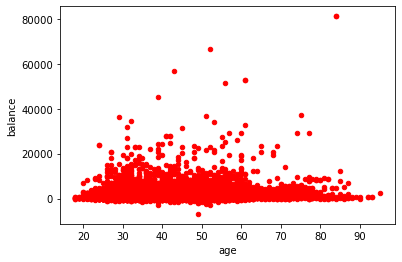

In [53]:
bank_with_dummies.plot(kind='scatter', x='age', y='balance',color='red')

<AxesSubplot:ylabel='Frequency'>

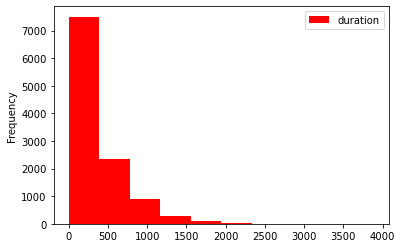

In [56]:
bank_with_dummies.plot(kind='hist', x='poutcome_success', y='duration',color='red')

In [57]:
bank_with_dummies[df_data.deposit_cat == 1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='job', ylabel='deposit_cat'>

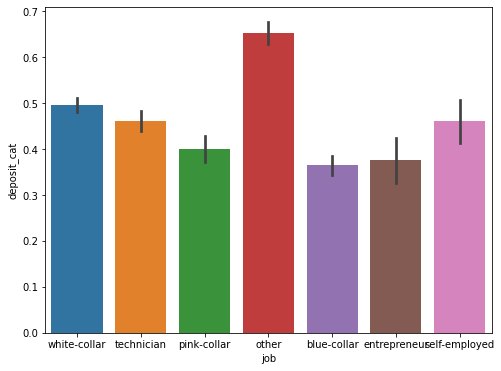

In [61]:
plt.figure(figsize = (8,6))
sns.barplot(x='job', y = 'deposit_cat', data =df_data)


<AxesSubplot:xlabel='poutcome', ylabel='duration'>

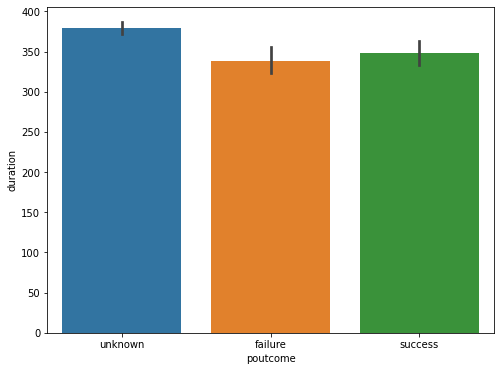

In [60]:
plt.figure(figsize = (8,6))
sns.barplot(x='poutcome', y = 'duration', data = df_data)

## Classification

In [62]:
bankcl = bank_with_dummies

In [63]:
corr = bankcl.corr()

In [64]:
corr

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.168700,-0.031418,0.034901,0.019102,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.077092,-0.084589,0.081129,-0.004379,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,0.035051,-0.001914,0.451919,-0.014868,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.006660,0.034722,-0.128081,-0.026296,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.000840,-0.022668,0.139867,0.122076,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.011076,0.076434,-0.040680,-0.011290,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
housing_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,1.000000,0.076761,-0.203888,-0.029350,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,0.076761,1.000000,-0.110580,-0.012697,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.203888,-0.110580,1.000000,0.034457,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.029350,-0.012697,0.034457,1.000000,...,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

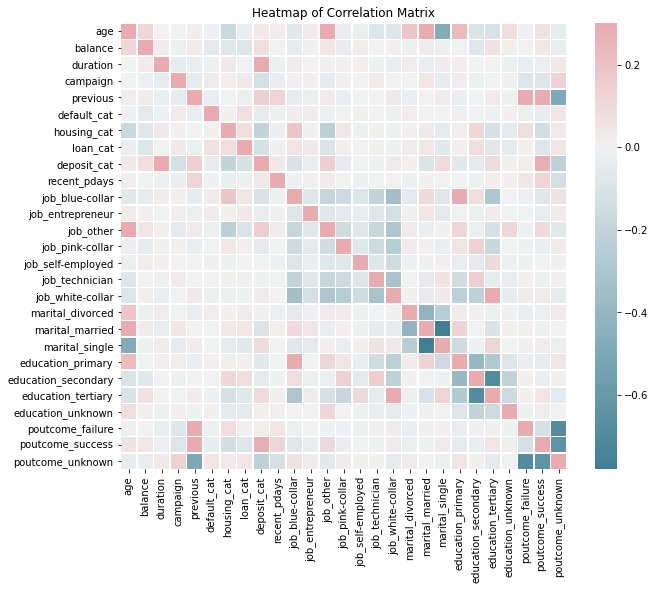

In [65]:
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [66]:
corr_deposite = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposite.sort_values(by = 'deposit_cat', ascending = False)

,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


## Build the model

In [67]:
# Train-Test split: 20% test data
data_drop_deposite = bankcl.drop('deposit_cat', 1)
label = bankcl.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, test_size = 0.2, random_state = 50)



In [73]:
# Decision tree with depth = 2
for i in range(1,11):
    dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=i)
    dt2.fit(data_train, label_train)
    dt2_score_train = dt2.score(data_train, label_train)
    print(f"Training score for max_depth of {i}: ",dt2_score_train)
    dt2_score_test = dt2.score(data_test, label_test)
    print(f"Testing score for max_depth of {i}: ",dt2_score_test)
    print("\n")

Training score for max_depth of 1:  0.7112778586627841
Testing score for max_depth of 1:  0.7111509180474698


Training score for max_depth of 2:  0.7285250307985217
Testing score for max_depth of 2:  0.7268248992386923


Training score for max_depth of 3:  0.770411020271027
Testing score for max_depth of 3:  0.7572772055530677


Training score for max_depth of 4:  0.7885541494008288
Testing score for max_depth of 4:  0.774294670846395


Training score for max_depth of 5:  0.7976257139657297
Testing score for max_depth of 5:  0.7760859829825347


Training score for max_depth of 6:  0.8080412140217269
Testing score for max_depth of 6:  0.7796686072548141


Training score for max_depth of 7:  0.8200246388173368
Testing score for max_depth of 7:  0.7854903716972682


Training score for max_depth of 8:  0.8318960689886885
Testing score for max_depth of 8:  0.7828034034930587


Training score for max_depth of 9:  0.8465673647664912
Testing score for max_depth of 9:  0.7841468875951635


Tra